# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [36]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data

Table = soup.find_all('tr', class_="data-row")
Table

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# Create an empty list

List = []

# Loop through the scraped data to create a list of rows

for row in Table:
    
    Stuff = row.find_all('td')
    id = Stuff[0].text.strip()
    terrestrial_date = Stuff[1].text.strip()
    sol = Stuff[2].text.strip()
    ls = Stuff[3].text.strip()
    month = Stuff[4].text.strip()
    min_temp = Stuff[5].text.strip()
    pressure = Stuff[6].text.strip()
    
    data_dict = {
        "Id": id,
        "Terrestrial Date": terrestrial_date,
        "Sol": sol,
        "Ls": ls,
        "Month": month,
        "Minimum Temperature": min_temp,
        "Pressure": pressure
    }
    
    List.append(data_dict)
    
    #print(List)

In [9]:
# Create dataframe from list

Mars_DF = pd.DataFrame(List)

In [10]:
# Confirm DataFrame was created successfully

Mars_DF.tail(10)

,Id,Terrestrial Date,Sol,Ls,Month,Minimum Temperature,Pressure
1857,1886,2018-02-18,1968,131,5,-76.0,732.0
1858,1887,2018-02-19,1969,131,5,-76.0,732.0
1859,1888,2018-02-20,1970,132,5,-77.0,731.0
1860,1890,2018-02-21,1971,132,5,-78.0,731.0
1861,1891,2018-02-22,1972,133,5,-78.0,730.0
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0
1866,1895,2018-02-27,1977,135,5,-77.0,727.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column

Mars_DF.dtypes

Id                     object
Terrestrial Date       object
Sol                    object
Ls                     object
Month                  object
Minimum Temperature    object
Pressure               object
dtype: object

In [12]:
# Change data types for data analysis

Mars_DF['Sol'] = Mars_DF['Sol'].astype(int)
Mars_DF['Terrestrial Date'] = pd.to_datetime(Mars_DF['Terrestrial Date'])
Mars_DF['Month'] = Mars_DF['Month'].astype(int)
Mars_DF['Ls'] = Mars_DF['Ls'].astype(int)
Mars_DF['Minimum Temperature'] = Mars_DF['Minimum Temperature'].astype(float)
Mars_DF['Pressure'] = Mars_DF['Pressure'].astype(float)

In [13]:
# Confirm type changes were successful by examining data types again

Mars_DF.dtypes

Id                             object
Terrestrial Date       datetime64[ns]
Sol                             int32
Ls                              int32
Month                           int32
Minimum Temperature           float64
Pressure                      float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [33]:
# 1. How many months are there on Mars?

Amount = Mars_DF.groupby('Month')['Month'].sum()
Amount

Month
1      174
2      356
3      576
4      776
5      745
6      882
7      994
8     1128
9     1206
10    1120
11    1518
12    1992
Name: Month, dtype: int32

In [16]:
# 2. How many Martian days' worth of data are there?

Total_days = len(Mars_DF['Sol'])
Total_days

1867

In [39]:
# 3. What is the average low temperature by month?

Ave_low = Mars_DF.groupby("Month")["Minimum Temperature"].mean()
Ave_low

Month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: Minimum Temperature, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

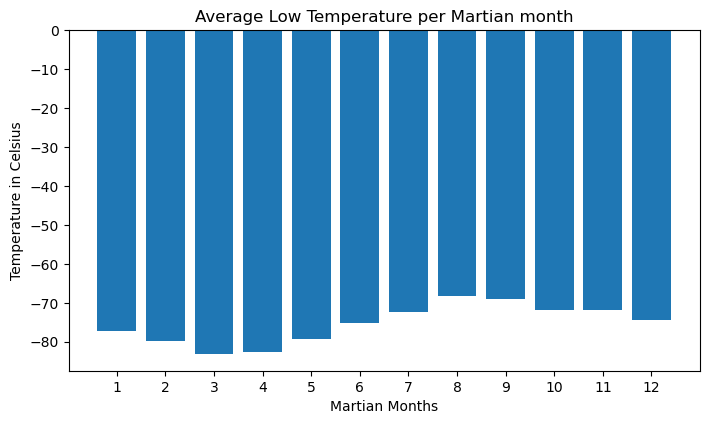

In [55]:
# Plot the average temperature by month

Ave_low_DF = pd.DataFrame(Ave_low)

x_axis = np.arange(len(Ave_low_DF))
tick_loc = [x for x in x_axis]

plt.figure(figsize=(7,4))
plt.bar(x_axis, Ave_low_DF['Minimum Temperature'])
plt.xticks(tick_loc, Ave_low_DF.index)
plt.tight_layout()
plt.title("Average Low Temperature per Martian month")
plt.xlabel("Martian Months")
plt.ylabel("Temperature in Celsius")
plt.show

Text(42.847222222222214, 0.5, 'Temperature in Celsius')

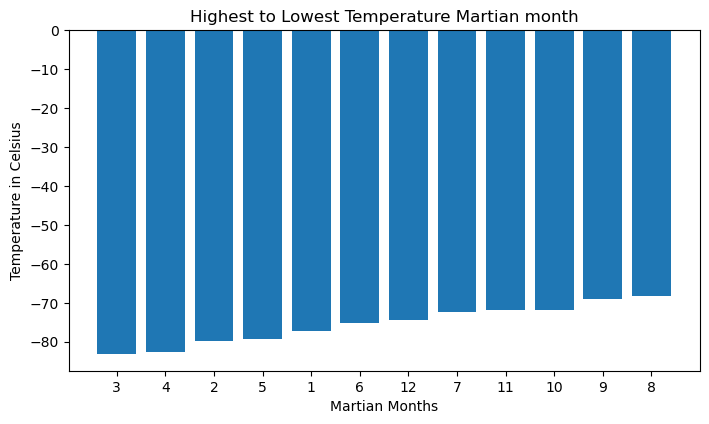

In [57]:
# Identify the coldest and hottest months in Curiosity's location

Hot_days_DF = Ave_low_DF.sort_values("Minimum Temperature")

x_axis = np.arange(len(Hot_days_DF))
tick_loc = [x for x in x_axis]

plt.figure(figsize=(7,4))
plt.bar(x_axis, Hot_days_DF['Minimum Temperature'])
plt.xticks(tick_loc, Hot_days_DF.index)
plt.tight_layout()
plt.title("Highest to Lowest Temperature Martian month")
plt.xlabel("Martian Months")
plt.ylabel("Temperature in Celsius")

In [58]:
# 4. Average pressure by Martian month

Ave_pres = Mars_DF.groupby('Month')['Pressure'].mean()
Ave_pres

Month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: Pressure, dtype: float64

Text(45.597222222222214, 0.5, 'Pressure')

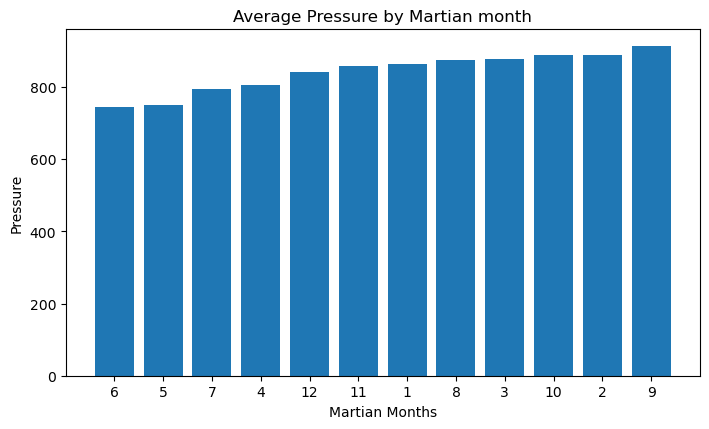

In [69]:
# Plot the average pressure by month

Ave_pres_DF = pd.DataFrame(Ave_pres)
Ave_pres_sort = Ave_pres_DF.sort_values('Pressure')

x_axis = np.arange(len(Ave_pres_sort))
tick_loc = [x for x in x_axis]

plt.figure(figsize=(7,4))
plt.bar(x_axis, Ave_pres_sort['Pressure'])
plt.xticks(tick_loc, Ave_pres_sort.index)
plt.tight_layout()
plt.title("Average Pressure by Martian month")
plt.xlabel("Martian Months")
plt.ylabel("Pressure")

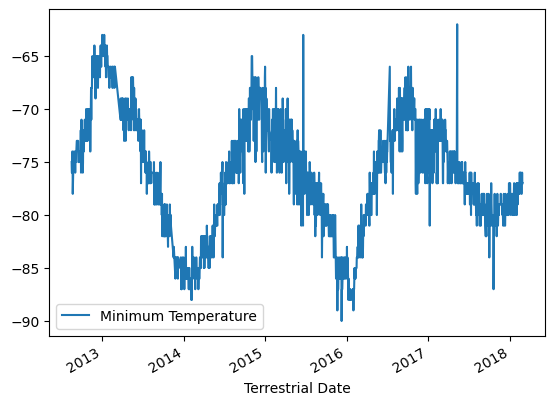

In [116]:
# 5. How many terrestrial (earth) days are there in a Martian year?

Per_day = Mars_DF[['Terrestrial Date','Minimum Temperature']]
Per_day
Per_day.set_index('Terrestrial Date', inplace=True)

Graph = Per_day.plot.line()

In [122]:
Mars_DF
Mars_DF.drop('Terrestrial Day #', axis=1, inplace=True)
Mars_DF

KeyError: "['Terrestrial Day #'] not found in axis"

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [117]:
# Write the data to a CSV

Mars_DF.to_csv('MarsDate.csv', index=False)

In [118]:
browser.quit()